<p style="background-color:#ff7043;font-family: 'Georgia';color:#FFFFFF;font-size:200%;text-align:center;border-radius:10px 10px;">
    Import Needed Libraries
</p>

In [92]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,PrecisionRecallDisplay,RocCurveDisplay

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

<span style="font-size:28px; font-family: 'Georgia', serif; color:#8d6e63; font-weight:bold;"> Load Data</span>

In [3]:
data = pd.read_csv(r"C:\Users\Hp\Desktop\Projectss_in_ML_Dl\DATASETS\Heart\heart.csv")

<p style="background-color:#ff7043;font-family: 'Georgia';color:#FFFFFF;font-size:200%;text-align:center;border-radius:10px 10px;"> Exploratory Data Analysis (EDA) </p>

In [4]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
data.duplicated().sum()

1

<span style="font-size:24px; font-family: 'Georgia', serif; color:#8d6e63; font-weight:bold;"> Summary statistics </span>


In [9]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<p style="background-color:#ff7043;font-family: 'Georgia';color:#FFFFFF;font-size:200%;text-align:center;border-radius:10px 10px;"> Data Visualizization </p>

<span style="font-size:24px; font-family: 'Georgia', serif; color:#8d6e63; font-weight:bold;"> List of numerical columns
 </span>

In [11]:
plt.figure(figsize=(10, 5))

num_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

<Figure size 1000x500 with 0 Axes>

<span style="font-size:24px; font-family: 'Georgia', serif; color:#8d6e63; font-weight:bold;"> Create histograms
 </span>

C:\Users\Hp\anaconda3\envs\deeplearning\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Hp\anaconda3\envs\deeplearning\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Hp\anaconda3\envs\deeplearning\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Hp\anaconda3\envs\deeplearning\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

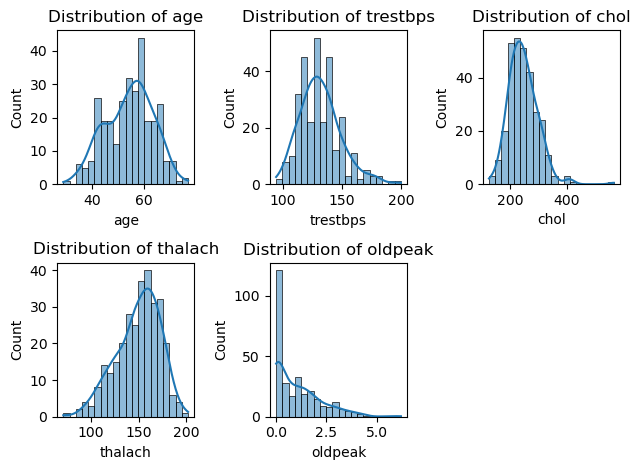

In [12]:
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i + 1)
    sns.histplot(data[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

The histograms illustrate the distribution of key features related to heart disease in the dataset:

Age: The spread of patient ages.
Resting Blood Pressure (trestbps): The distribution of blood pressure values.
Cholesterol (chol): The range of cholesterol levels.
Max Heart Rate (thalach): The distribution of maximum heart rates achieved.
ST Depression (oldpeak): The variation in ST depression values, which indicate heart stress levels.
These plots provide a quick overview of how these features are distributed, helping to identify trends or outliers in the data.

<span style="font-size:24px; font-family: 'Georgia', serif; color:#8d6e63; font-weight:bold;">  Create box plots
 </span>

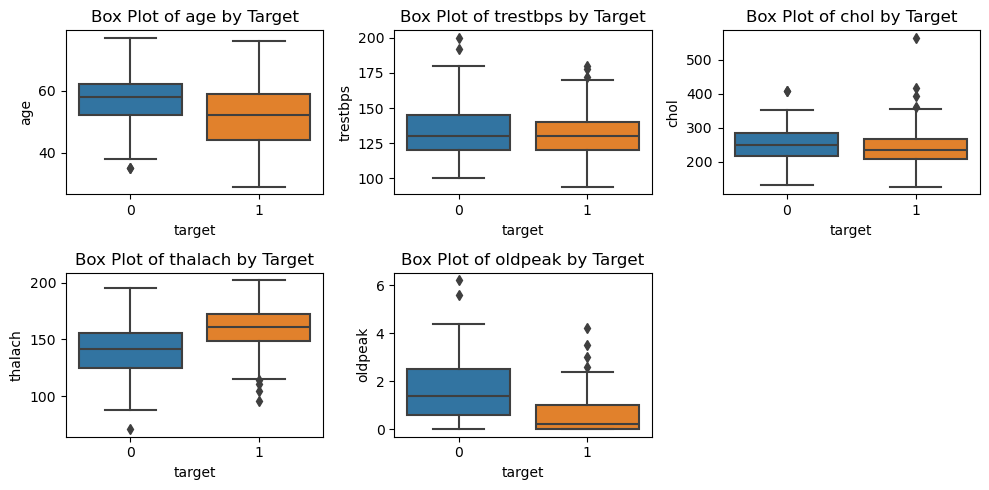

In [13]:
plt.figure(figsize=(10, 5))

for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=data['target'], y=data[col])
    plt.title(f'Box Plot of {col} by Target')

plt.tight_layout()
plt.show()

The box plots compare key features like age, blood pressure, and cholesterol levels between patients with and without heart disease, revealing potential differences that may indicate the presence of the condition. This visualization aids in identifying how these features vary across the two groups.

<span style="font-size:24px; font-family: 'Georgia', serif; color:#8d6e63; font-weight:bold;">  scatter plot for age vs. thalach
 </span>

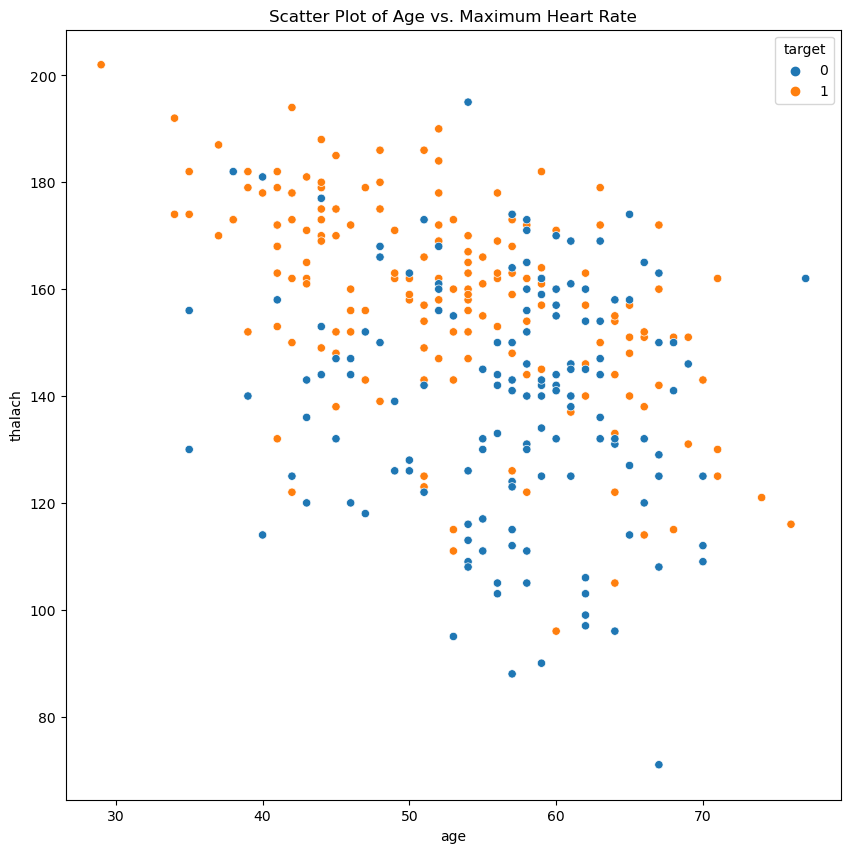

In [14]:
plt.figure(figsize=(10, 10))

sns.scatterplot(data=data, x='age', y='thalach', hue='target')
plt.title('Scatter Plot of Age vs. Maximum Heart Rate')
plt.show()

<span style="font-size:24px; font-family: 'Georgia', serif; color:#8d6e63; font-weight:bold;">  pie chart
 </span>

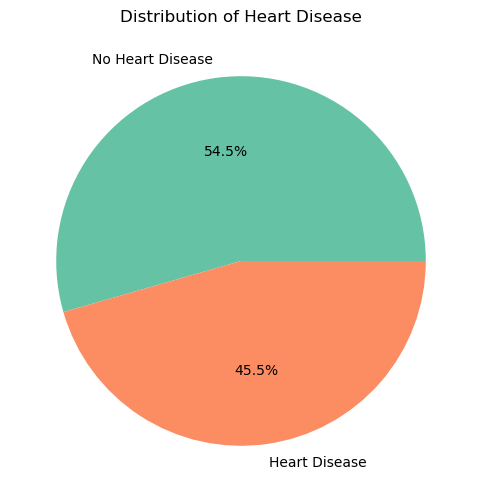

In [21]:
target_counts = data['target'].value_counts()

labels = ['No Heart Disease', 'Heart Disease']

plt.figure(figsize=(8, 6))
plt.pie(target_counts, autopct="%.1f%%", labels=labels, colors=['#66c2a5', '#fc8d62'])
plt.title('Distribution of Heart Disease')
plt.show()

This pie chart visualizes the distribution of heart disease within the dataset, showing the proportion of individuals with and without the condition.

<span style="font-size:24px; font-family: 'Georgia', serif; color:#8d6e63; font-weight:bold;">  Pair plot
 </span>

C:\Users\Hp\anaconda3\envs\deeplearning\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Hp\anaconda3\envs\deeplearning\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Hp\anaconda3\envs\deeplearning\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Hp\anaconda3\envs\deeplearning\lib\site-packages\seabo

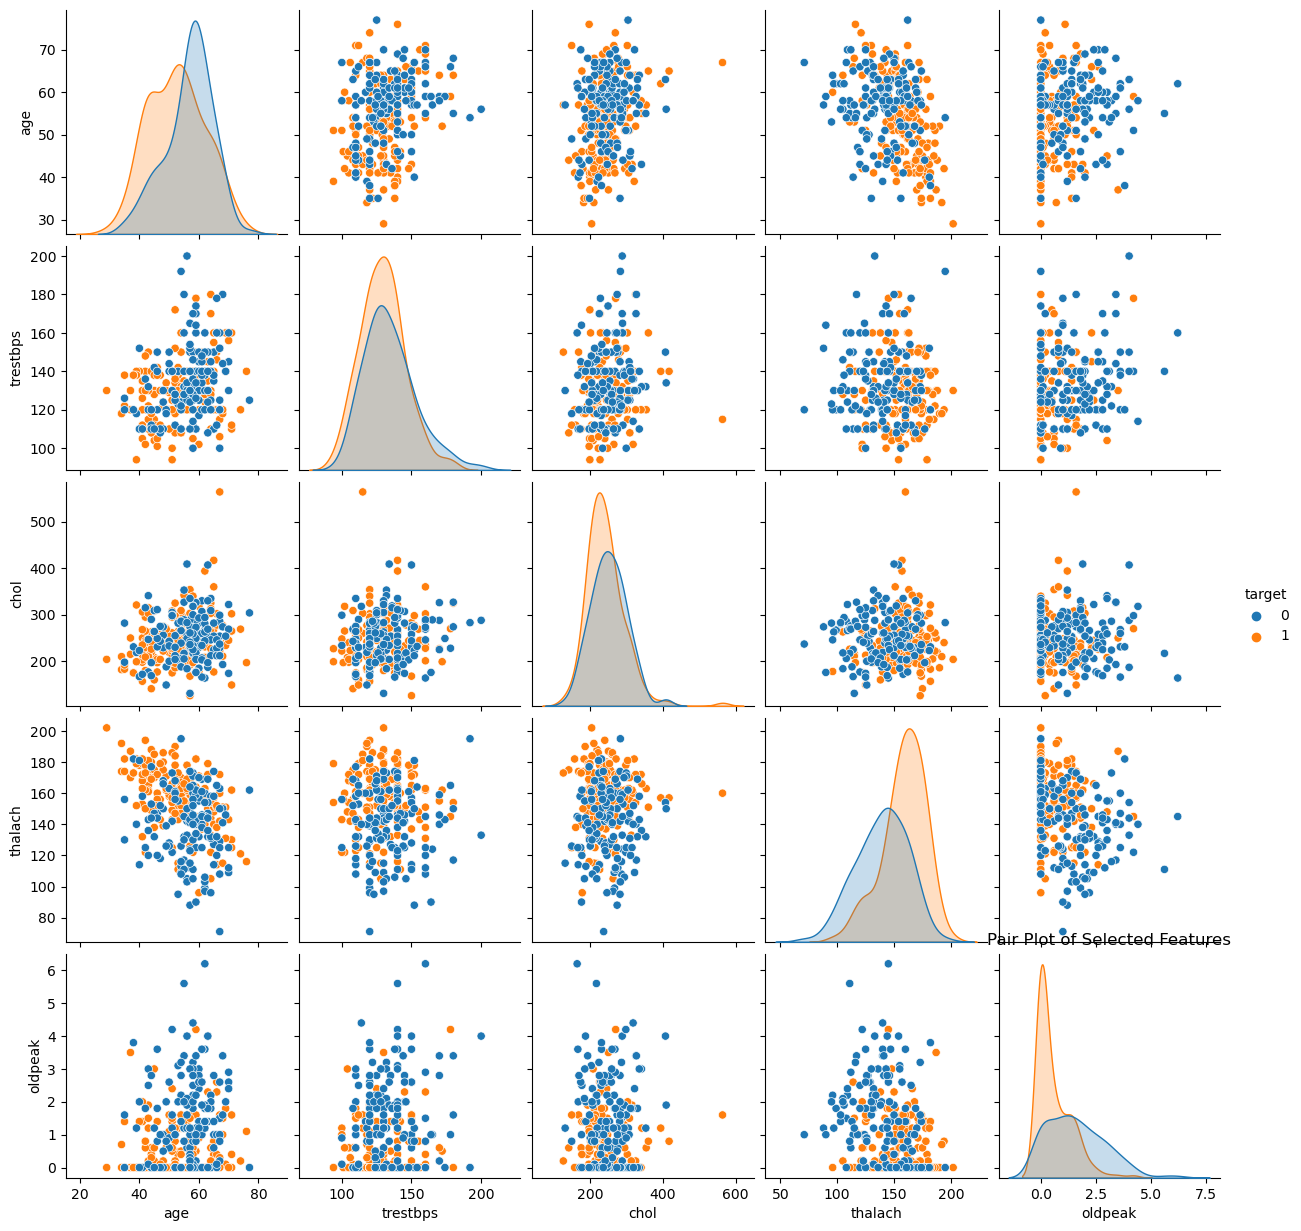

In [22]:
sns.pairplot(data, hue='target', vars=['age', 'trestbps', 'chol', 'thalach', 'oldpeak'])
plt.title('Pair Plot of Selected Features')
plt.show()

The pair plot is crucial for exploring the relationships and potential correlations between key features in the dataset, helping to identify patterns and differences between individuals with and without heart disease.

<p style="background-color:#ff7043;font-family: 'Georgia';color:#FFFFFF;font-size:200%;text-align:center;border-radius:10px 10px;"> Data Preprocessing </p>

<span style="font-size:22px; font-family: 'Georgia', serif; color:#8d6e63; font-weight:bold;">  One-hot encode categorical columns
 </span>

In [23]:
data_encoded = pd.get_dummies(data, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

<span style="font-size:22px; font-family: 'Georgia', serif; color:#8d6e63; font-weight:bold;"> List of numerical features
 </span>

In [24]:
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

<span style="font-size:22px; font-family: 'Georgia', serif; color:#8d6e63; font-weight:bold;"> Initialize the scaler
 </span>

In [25]:
scaler = StandardScaler()

<span style="font-size:22px; font-family: 'Georgia', serif; color:#8d6e63; font-weight:bold;"> Scale numerical features
 </span>

In [26]:
data_encoded[numerical_features] = scaler.fit_transform(data_encoded[numerical_features])

<span style="font-size:22px; font-family: 'Georgia', serif; color:#8d6e63; font-weight:bold;"> Separate the target variable and features
 </span>

In [27]:
X = data_encoded.drop('target', axis=1)
y = data_encoded['target']

<span style="font-size:22px; font-family: 'Georgia', serif; color:#8d6e63; font-weight:bold;"> Split the data
 </span>

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<p style="background-color:#ff7043;font-family: 'Georgia';color:#FFFFFF;font-size:200%;text-align:center;border-radius:10px 10px;"> Buliding Models </p>

<p style="background-color:#FFFFFF;font-family: 'Georgia';color:#000000;font-size:180%;text-align:center;text-decoration:underline;font-style:italic;font-weight:bold;border-radius:15px 10px;"> SVM Model </p>






<span style="font-size:22px; font-family: 'Georgia', serif; color:#8d6e63; font-weight:bold;"> SVM model with RBF kernel
 </span>

In [29]:
# Initialize the SVM model with RBF kernel
svm_model_rbf = SVC(kernel='rbf', random_state=42)

In [30]:
# Train the model
svm_model_rbf.fit(X_train, y_train)

SVC(random_state=42)

In [31]:
# Predict on the test set
y_pred_rbf = svm_model_rbf.predict(X_test)

In [32]:
# Evaluate the model
print('SVM Model with RBF Kernel Results:')
print('Accuracy:', accuracy_score(y_test, y_pred_rbf))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_rbf))
print('Classification Report:\n', classification_report(y_test, y_pred_rbf))

SVM Model with RBF Kernel Results:
Accuracy: 0.8791208791208791
Confusion Matrix:
 [[36  5]
 [ 6 44]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87        41
           1       0.90      0.88      0.89        50

    accuracy                           0.88        91
   macro avg       0.88      0.88      0.88        91
weighted avg       0.88      0.88      0.88        91



<span style="font-size:22px; font-family: 'Georgia', serif; color:#8d6e63; font-weight:bold;"> SVM model with Sigmoid kernel
 </span>

In [33]:
# Initialize the SVM model with Sigmoid kernel
svm_model_sigmoid = SVC(kernel='sigmoid', random_state=42)

In [34]:
# Train the model
svm_model_sigmoid.fit(X_train, y_train)

SVC(kernel='sigmoid', random_state=42)

In [35]:
# Predict on the test set
y_pred_sigmoid = svm_model_sigmoid.predict(X_test)

In [36]:
# Evaluate the model
print('SVM Model with Sigmoid Kernel Results:')
print('Accuracy:', accuracy_score(y_test, y_pred_sigmoid))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_sigmoid))
print('Classification Report:\n', classification_report(y_test, y_pred_sigmoid))

SVM Model with Sigmoid Kernel Results:
Accuracy: 0.8681318681318682
Confusion Matrix:
 [[35  6]
 [ 6 44]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85        41
           1       0.88      0.88      0.88        50

    accuracy                           0.87        91
   macro avg       0.87      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91



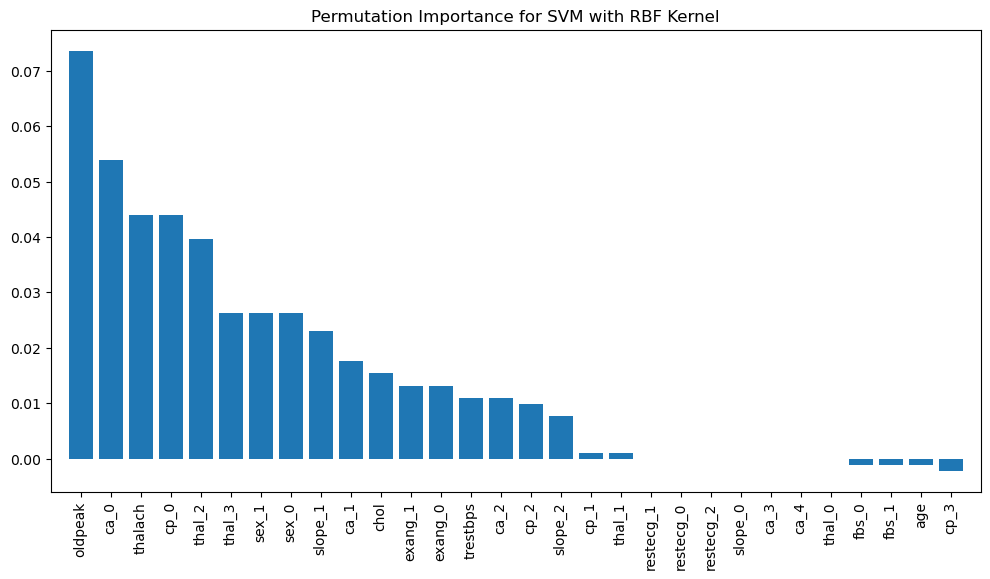

In [86]:
from sklearn.inspection import permutation_importance

# Compute permutation importance
result = permutation_importance(svm_model_rbf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Get importances
importances = result.importances_mean
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title('Permutation Importance for SVM with RBF Kernel')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


<p style="background-color:#FFFFFF;font-family: 'Georgia';color:#000000;font-size:180%;text-align:center;text-decoration:underline;font-style:italic;font-weight:bold;border-radius:15px 10px;">Logistic Regression Model </p>

In [37]:
# Initialize the model
log_reg = LogisticRegression(max_iter=1000)

In [38]:
# Fit the model
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [39]:
# Predict on the test set
y_pred_log_reg = log_reg.predict(X_test)

Logistic Regression
Accuracy: 0.8571428571428571
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.80      0.84        41
           1       0.85      0.90      0.87        50

    accuracy                           0.86        91
   macro avg       0.86      0.85      0.85        91
weighted avg       0.86      0.86      0.86        91



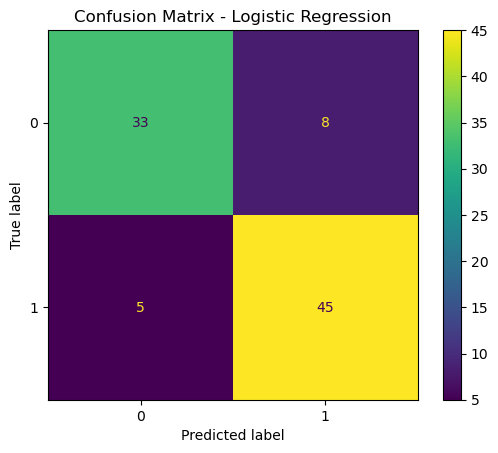

In [40]:
# Evaluate the model
print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_log_reg)).plot()
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

<span style="font-size:22px; font-family: 'Georgia', serif; color:#8d6e63; font-weight:bold;"> Hyperparameter tuning for the Logistic Regression model
 </span>

In [41]:
# Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'saga'],
    'penalty': ['l2']  # 'l1' is supported by 'liblinear' and 'saga' solvers
}

In [42]:
# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

In [43]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

In [44]:
# Fit GridSearchCV
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l2'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg', 'saga']},
             scoring='accuracy', verbose=1)

In [45]:
# Get the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Score: 0.8297895902547066


In [46]:
# Predict with the best model
y_pred_best_log_reg = grid_search.best_estimator_.predict(X_test)

Best Logistic Regression Model
Accuracy: 0.8571428571428571
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.80      0.84        41
           1       0.85      0.90      0.87        50

    accuracy                           0.86        91
   macro avg       0.86      0.85      0.85        91
weighted avg       0.86      0.86      0.86        91



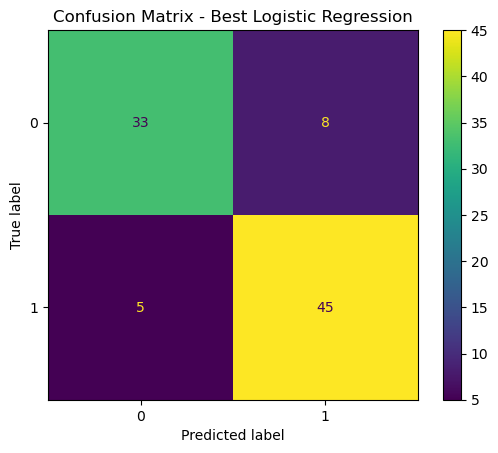

In [47]:
# Evaluate the best model
print("Best Logistic Regression Model")
print("Accuracy:", accuracy_score(y_test, y_pred_best_log_reg))
print("Classification Report:\n", classification_report(y_test, y_pred_best_log_reg))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_best_log_reg)).plot()
plt.title('Confusion Matrix - Best Logistic Regression')
plt.show()

<p style="background-color:#FFFFFF;font-family: 'Georgia';color:#000000;font-size:180%;text-align:center;text-decoration:underline;font-style:italic;font-weight:bold;border-radius:15px 10px;">Random Forest Model </p>

In [50]:
# Initialize the model
rf = RandomForestClassifier()

In [51]:
# Fit the model
rf.fit(X_train, y_train)

RandomForestClassifier()

In [52]:
# Predict on the test set
y_pred_rf = rf.predict(X_test)

Random Forest
Accuracy: 0.8241758241758241
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80        41
           1       0.84      0.84      0.84        50

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91



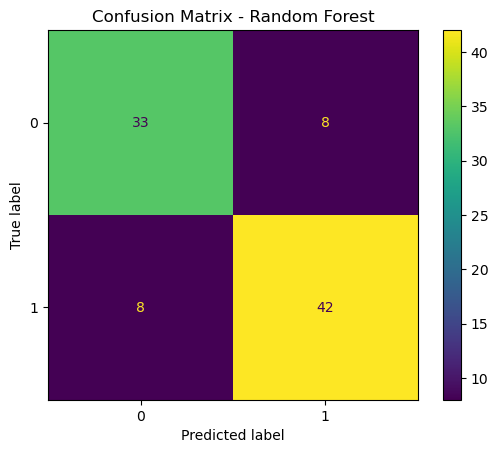

In [53]:
# Evaluate the model
print("Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_rf)).plot()
plt.title('Confusion Matrix - Random Forest')
plt.show()

<span style="font-size:22px; font-family: 'Georgia', serif; color:#8d6e63; font-weight:bold;"> Hyperparameter tuning for for Random Forest
 </span>

In [54]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

In [55]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, scoring='accuracy')

In [56]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [57]:
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}
Best Score: 0.8487264673311185


In [58]:
y_pred_best_rf = grid_search.best_estimator_.predict(X_test)

Best Random Forest from GridSearchCV
Accuracy: 0.8351648351648352
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.85      0.82        41
           1       0.87      0.82      0.85        50

    accuracy                           0.84        91
   macro avg       0.83      0.84      0.83        91
weighted avg       0.84      0.84      0.84        91



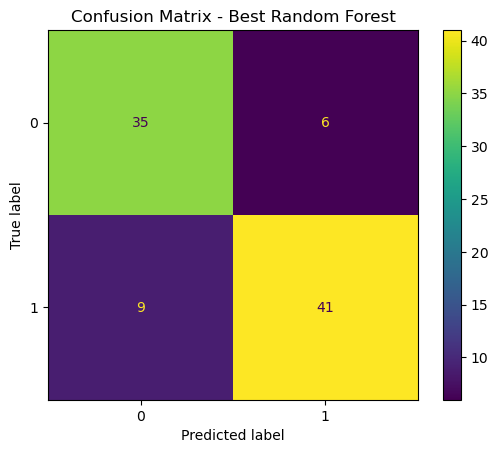

In [59]:
print("Best Random Forest from GridSearchCV")
print("Accuracy:", accuracy_score(y_test, y_pred_best_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_best_rf))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_best_rf)).plot()
plt.title('Confusion Matrix - Best Random Forest')
plt.show()

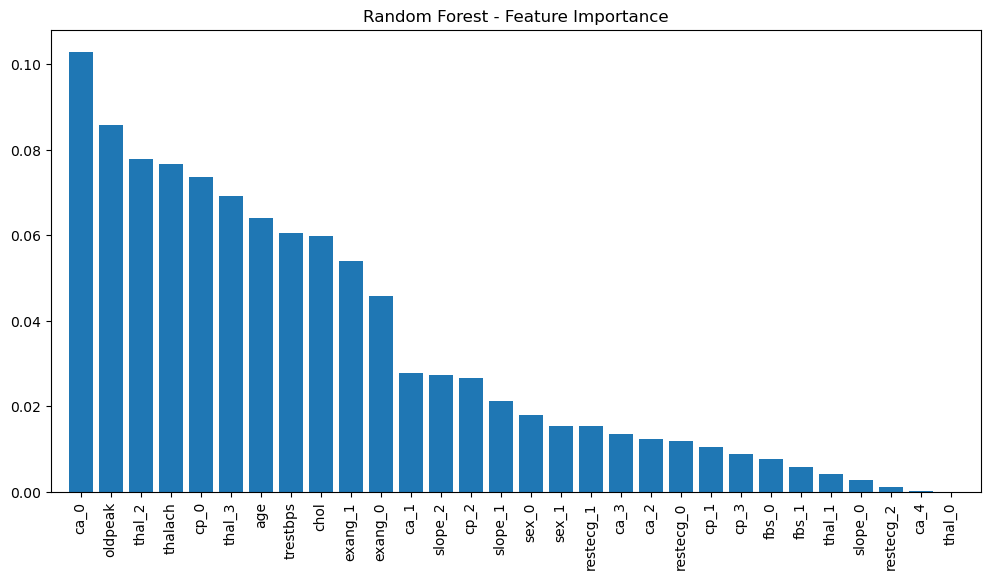

In [88]:
# Feature importances from Random Forest
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title('Random Forest - Feature Importance')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


<p style="background-color:#FFFFFF;font-family: 'Georgia';color:#000000;font-size:180%;text-align:center;text-decoration:underline;font-style:italic;font-weight:bold;border-radius:15px 10px;">Gradient Boosting Model </p>

In [60]:
gb = GradientBoostingClassifier()

In [61]:
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [62]:
y_pred_gb = gb.predict(X_test)

Gradient Boosting
Accuracy: 0.7802197802197802
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.80      0.77        41
           1       0.83      0.76      0.79        50

    accuracy                           0.78        91
   macro avg       0.78      0.78      0.78        91
weighted avg       0.78      0.78      0.78        91



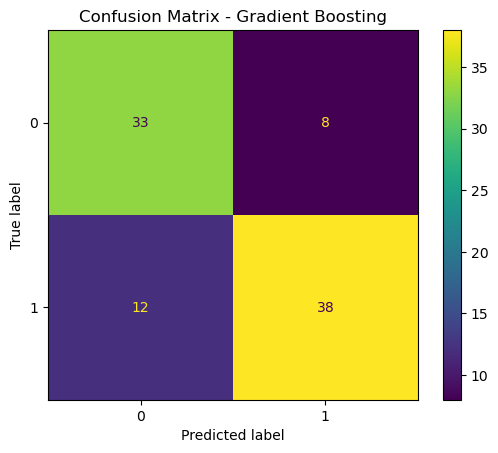

In [63]:
print("Gradient Boosting")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Classification Report:\n", classification_report(y_test, y_pred_gb))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_gb)).plot()
plt.title('Confusion Matrix - Gradient Boosting')
plt.show()

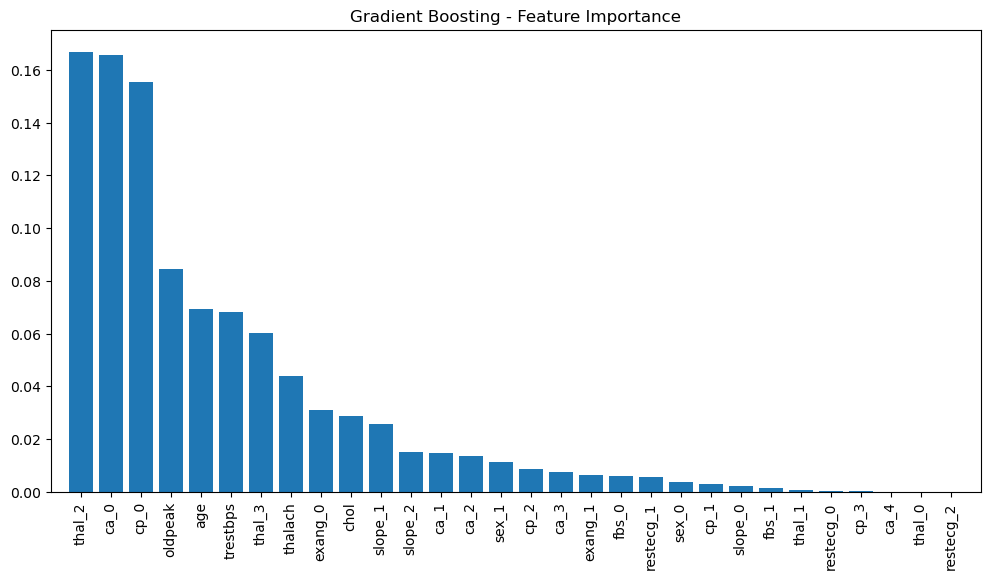

In [89]:
# Feature importances from Gradient Boosting
importances = gb.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title('Gradient Boosting - Feature Importance')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


<p style="background-color:#FFFFFF;font-family: 'Georgia';color:#000000;font-size:180%;text-align:center;text-decoration:underline;font-style:italic;font-weight:bold;border-radius:15px 10px;">Neural Network Model </p>

In [77]:
# Convert data to float32
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

In [78]:
# Define the Neural Network model
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [79]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [80]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
6/6 [==============================] - 4s 157ms/step - loss: 0.9014 - accuracy: 0.5266 - val_loss: 0.7239 - val_accuracy: 0.5116
Epoch 2/50
6/6 [==============================] - 0s 25ms/step - loss: 0.8227 - accuracy: 0.5503 - val_loss: 0.6921 - val_accuracy: 0.5581
Epoch 3/50
6/6 [==============================] - 0s 18ms/step - loss: 0.7626 - accuracy: 0.6036 - val_loss: 0.6666 - val_accuracy: 0.5814
Epoch 4/50
6/6 [==============================] - 0s 21ms/step - loss: 0.7150 - accuracy: 0.5917 - val_loss: 0.6459 - val_accuracy: 0.6512
Epoch 5/50
6/6 [==============================] - 0s 19ms/step - loss: 0.7655 - accuracy: 0.5858 - val_loss: 0.6281 - val_accuracy: 0.6512
Epoch 6/50
6/6 [==============================] - 0s 17ms/step - loss: 0.6623 - accuracy: 0.5976 - val_loss: 0.6132 - val_accuracy: 0.7209
Epoch 7/50
6/6 [==============================] - 0s 20ms/step - loss: 0.6284 - accuracy: 0.6746 - val_loss: 0.6007 - val_accuracy: 0.6977
Epoch 8/50
6/6 [==========

In [81]:
# Evaluate the model
train_loss, train_accuracy = model.evaluate(X_train, y_train)
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Test Accuracy: {test_accuracy:.2f}')

3/3 [==============================] - 0s 14ms/step - loss: 0.4239 - accuracy: 0.8462
Training Accuracy: 0.86
Test Accuracy: 0.85


In [82]:
# Make predictions
y_train_pred = (model.predict(X_train) > 0.5).astype("int32")
y_test_pred = (model.predict(X_test) > 0.5).astype("int32")

3/3 [==============================] - 0s 6ms/step


In [83]:
# Print classification report
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred))


Classification Report (Test Set):
              precision    recall  f1-score   support

         0.0       0.81      0.85      0.83        41
         1.0       0.88      0.84      0.86        50

    accuracy                           0.85        91
   macro avg       0.84      0.85      0.85        91
weighted avg       0.85      0.85      0.85        91



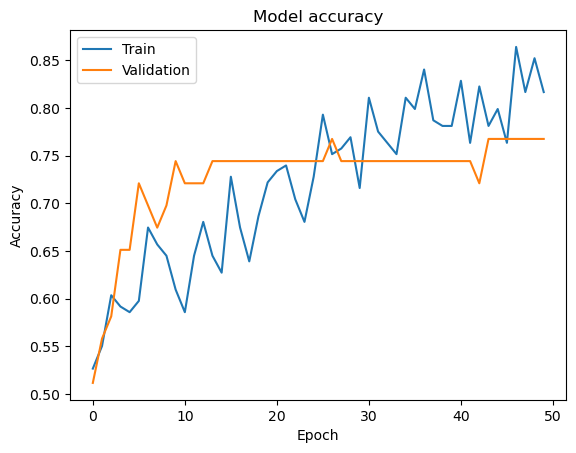

In [84]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

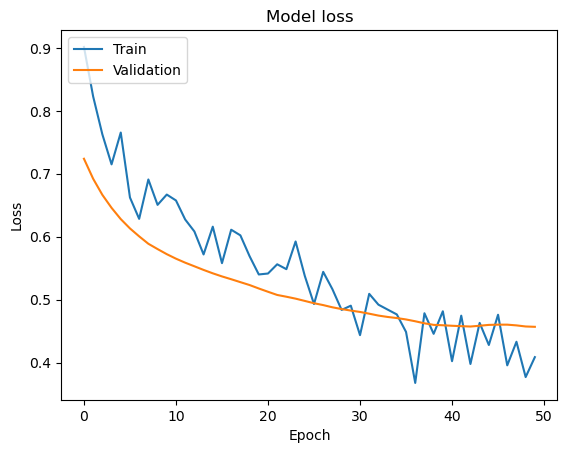

In [85]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()